In [2]:
%config Completer.use_jedi = False

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

- Figure: place includes axes
- Axes: locate chart and data

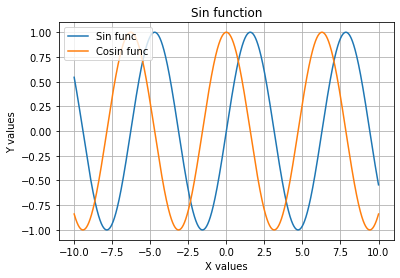

In [10]:
x = np.linspace(-10, 10, 10000)
y = np.sin(x)

plt.plot(x, y, label='Sin func')
plt.plot(x, np.cos(x), label='Cosin func')
plt.title('Sin function')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [11]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


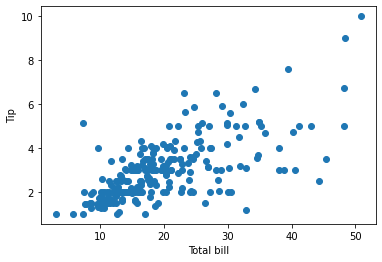

In [13]:
plt.scatter(tips.total_bill, tips.tip)
plt.ylabel('Tip')
plt.xlabel('Total bill');

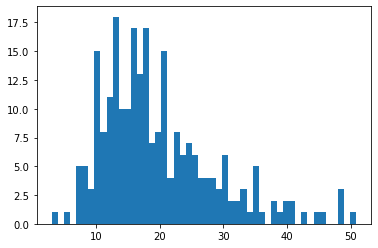

In [15]:
plt.hist(tips.total_bill, bins=50);

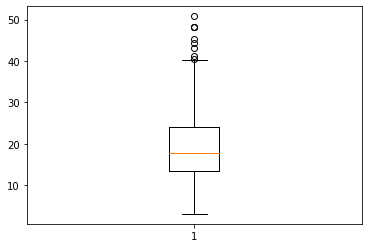

In [16]:
plt.boxplot(tips.total_bill);

In [17]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [21]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [19]:
time_percentage = tips.groupby('time').total_bill.sum()
time_percentage

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

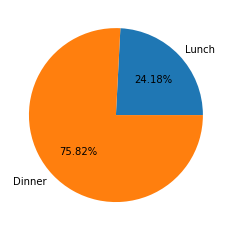

In [20]:
plt.pie(time_percentage.values, labels=time_percentage.index, autopct='%.2f%%');

In [23]:
day_percentage = tips.groupby('day').total_bill.sum()

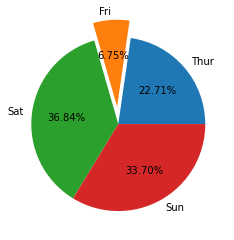

In [28]:
plt.pie(day_percentage.values, labels=day_percentage.index, autopct='%.2f%%', 
        explode=[0, 0.2, 0, 0]);

#### Subplots

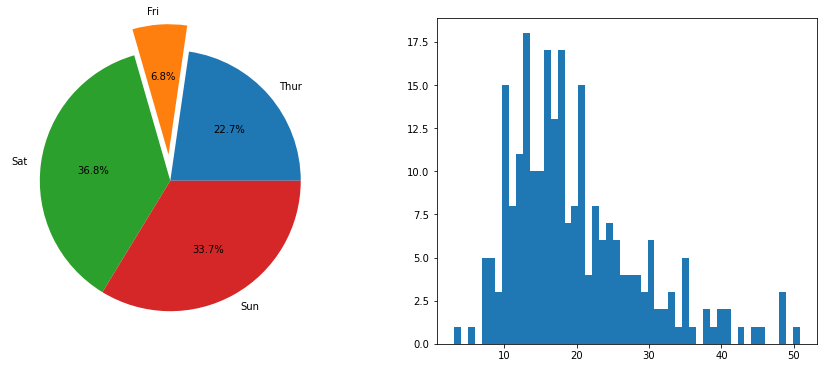

In [54]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(day_percentage.values, labels=day_percentage.index, autopct='%.1f%%', 
        explode=[0, 0.2, 0, 0])

plt.subplot(1, 2, 2)
plt.hist(tips.total_bill, bins=50)
plt.show()

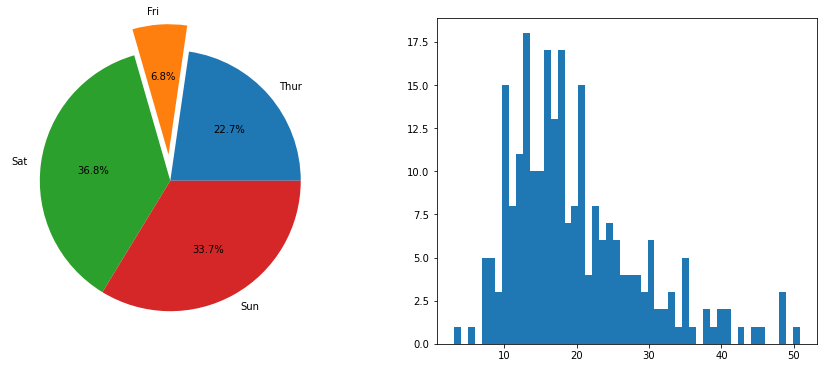

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[1].hist(tips.total_bill, bins=50)

axes[0].pie(day_percentage.values, labels=day_percentage.index, autopct='%.1f%%', 
        explode=[0, 0.2, 0, 0]);

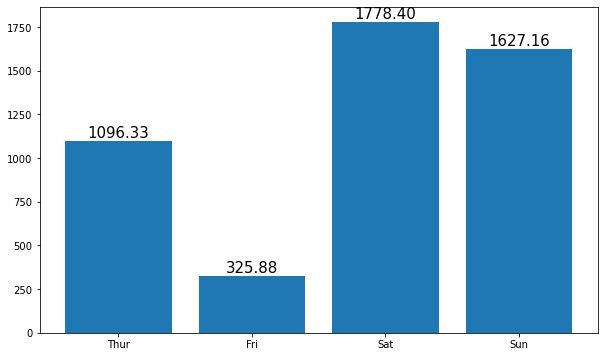

In [44]:
plt.figure(figsize=(10, 6))
axes = plt.bar(x=day_percentage.index, height=day_percentage.values)

for bar in axes.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points');

### Seaborn

In [65]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [67]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


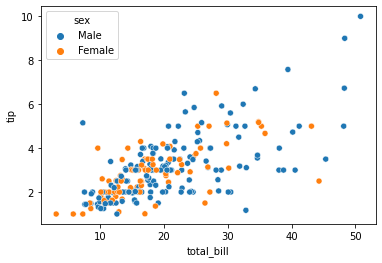

In [69]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex');

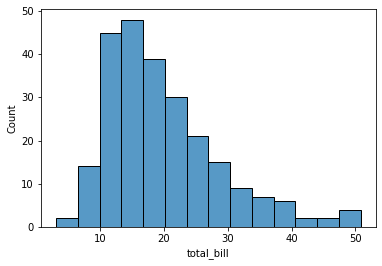

In [60]:
sns.histplot(data=tips, x='total_bill');

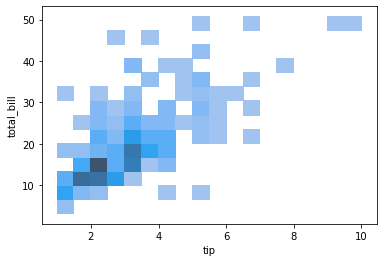

In [64]:
sns.histplot(data=tips, x='tip', y='total_bill');

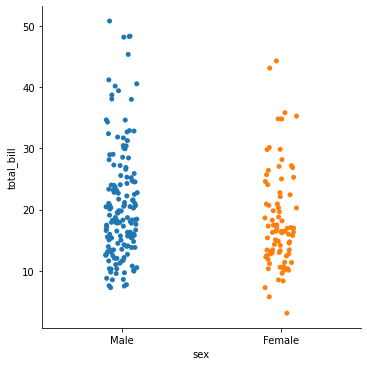

In [72]:
sns.catplot(data=tips, x='sex', y='total_bill', kind='strip');

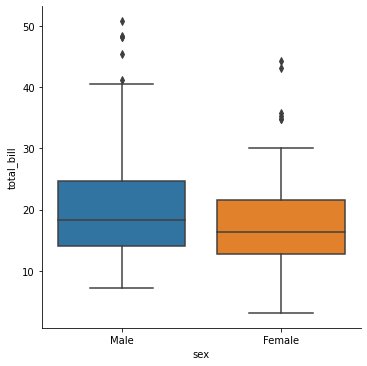

In [73]:
sns.catplot(data=tips, x='sex', y='total_bill', kind='box');

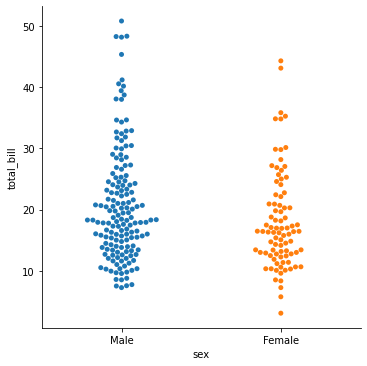

In [74]:
sns.catplot(data=tips, x='sex', y='total_bill', kind='swarm');

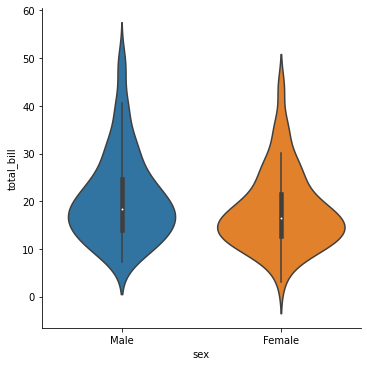

In [75]:
sns.catplot(data=tips, x='sex', y='total_bill', kind='violin');

#### Facet Grid

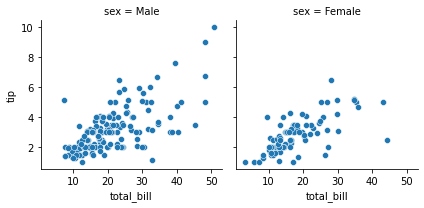

In [78]:
g = sns.FacetGrid(data=tips, col='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()

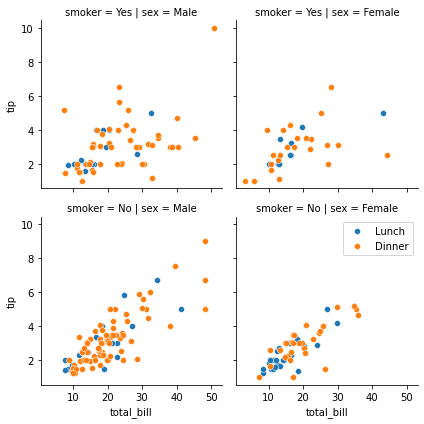

In [82]:
g = sns.FacetGrid(data=tips, col='sex', row='smoker', hue='time')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.legend()
plt.show()

In [84]:
import warnings
warnings.filterwarnings('ignore')

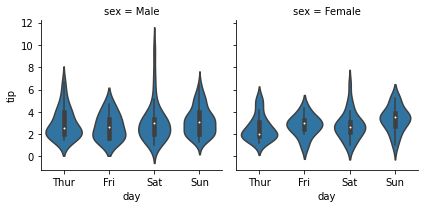

In [85]:
g = sns.FacetGrid(data=tips, col='sex')
g.map(sns.violinplot, 'day', 'tip')
# plt.legend()
plt.show()